# Predicting Total CPI-Adjusted Cost (Millions of Dollars), using kaggle dataset. 

In [54]:
#Importing neccesory 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt 
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

%matplotlib inline
sns.set()



In [55]:
data = pd.read_csv("Disaster.csv")
data.head()

,Name,Disaster,Begin Date,End Date,Total CPI-Adjusted Cost (Millions of Dollars),Deaths
0,Southern Severe Storms and Flooding (April 1980),Flooding,19800410,19800417,2551.4,7
1,Hurricane Allen (August 1980),Tropical Cyclone,19800807,19800811,2071,13
2,Central/Eastern Drought/Heat Wave (Summer-Fall...,Drought,19800601,19801130,37675.2,1260
3,Florida Freeze (January 1981),Freeze,19810112,19810114,1921.9,0
4,"Severe Storms, Flash Floods, Hail, Tornadoes (...",Severe Storm,19810505,19810510,1304.7,20


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 6 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Name                                           338 non-null    object
 1   Disaster                                       338 non-null    object
 2   Begin Date                                     338 non-null    int64 
 3   End Date                                       338 non-null    int64 
 4   Total CPI-Adjusted Cost (Millions of Dollars)  338 non-null    object
 5   Deaths                                         338 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 16.0+ KB


In [57]:
#deleteing the non relevant column

In [58]:
data.drop('Name',inplace = True, axis = 1)

In [59]:
data.head()

,Disaster,Begin Date,End Date,Total CPI-Adjusted Cost (Millions of Dollars),Deaths
0,Flooding,19800410,19800417,2551.4,7
1,Tropical Cyclone,19800807,19800811,2071,13
2,Drought,19800601,19801130,37675.2,1260
3,Freeze,19810112,19810114,1921.9,0
4,Severe Storm,19810505,19810510,1304.7,20


In [60]:
#dropping missing value 
data.dropna(inplace = True)

In [61]:
# for calculating the duration of the disaster we will need to convert it into the date format
from datetime import date

data['Begin Date'] = pd.to_datetime(data['Begin Date'], format = "%Y%m%d")
data['Begin Date']

0     1980-04-10
1     1980-08-07
2     1980-06-01
3     1981-01-12
4     1981-05-05
         ...    
333   2022-07-26
334   2022-09-17
335   2022-04-01
336   2022-01-01
337   2022-09-28
Name: Begin Date, Length: 338, dtype: datetime64[ns]

In [62]:
data['End Date'] = pd.to_datetime(data['End Date'], format = "%Y%m%d")
data['End Date']

0     1980-04-17
1     1980-08-11
2     1980-11-30
3     1981-01-14
4     1981-05-10
         ...    
333   2022-07-28
334   2022-09-18
335   2022-09-30
336   2022-09-30
337   2022-09-30
Name: End Date, Length: 338, dtype: datetime64[ns]

In [64]:
#duration of the disaster 
data["Duration"] = data['End Date'] - data["Begin Date"]
data["Duration"]

0       7 days
1       4 days
2     182 days
3       2 days
4       5 days
        ...   
333     2 days
334     1 days
335   182 days
336   272 days
337     2 days
Name: Duration, Length: 338, dtype: timedelta64[ns]

In [11]:
### printing the value counts of column "CPI"
print(data['Total CPI-Adjusted Cost (Millions of Dollars)'].value_counts())

TBD        3
1603.1     2
27840      2
2551.4     1
1488.7     1
          ..
31570.9    1
15092      1
24639.2    1
1070.3     1
9326.7     1
Name: Total CPI-Adjusted Cost (Millions of Dollars), Length: 334, dtype: int64


In [12]:

data.replace('TBD', float('nan'), inplace = True)

In [13]:
print(data['Total CPI-Adjusted Cost (Millions of Dollars)'].value_counts())

1603.1     2
27840      2
2551.4     1
1773.4     1
1398.4     1
          ..
15092      1
24639.2    1
1070.3     1
1571.7     1
9326.7     1
Name: Total CPI-Adjusted Cost (Millions of Dollars), Length: 333, dtype: int64


In [14]:
data['Total CPI-Adjusted Cost (Millions of Dollars)'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 338 entries, 0 to 337
Series name: Total CPI-Adjusted Cost (Millions of Dollars)
Non-Null Count  Dtype 
--------------  ----- 
335 non-null    object
dtypes: object(1)
memory usage: 2.8+ KB


In [65]:
#dropping na values
data.dropna(subset=['Total CPI-Adjusted Cost (Millions of Dollars)'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 6 columns):
 #   Column                                         Non-Null Count  Dtype          
---  ------                                         --------------  -----          
 0   Disaster                                       338 non-null    object         
 1   Begin Date                                     338 non-null    datetime64[ns] 
 2   End Date                                       338 non-null    datetime64[ns] 
 3   Total CPI-Adjusted Cost (Millions of Dollars)  338 non-null    object         
 4   Deaths                                         338 non-null    int64          
 5   Duration                                       338 non-null    timedelta64[ns]
dtypes: datetime64[ns](2), int64(1), object(2), timedelta64[ns](1)
memory usage: 16.0+ KB


In [16]:
data['Total CPI-Adjusted Cost (Millions of Dollars)'].info()

<class 'pandas.core.series.Series'>
Int64Index: 335 entries, 0 to 336
Series name: Total CPI-Adjusted Cost (Millions of Dollars)
Non-Null Count  Dtype 
--------------  ----- 
335 non-null    object
dtypes: object(1)
memory usage: 5.2+ KB


In [17]:
data["Cost"] = data['Total CPI-Adjusted Cost (Millions of Dollars)']
data = data.drop(['Total CPI-Adjusted Cost (Millions of Dollars)'], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335 entries, 0 to 336
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   Disaster    335 non-null    object         
 1   Begin Date  335 non-null    datetime64[ns] 
 2   End Date    335 non-null    datetime64[ns] 
 3   Deaths      335 non-null    int64          
 4   Duration    335 non-null    timedelta64[ns]
 5   Cost        335 non-null    object         
dtypes: datetime64[ns](2), int64(1), object(2), timedelta64[ns](1)
memory usage: 18.3+ KB


In [18]:
data["Disaster"].unique()

array(['Flooding', 'Tropical Cyclone', 'Drought', 'Freeze',
       'Severe Storm', 'Winter Storm', 'Wildfire'], dtype=object)

In [19]:
# will use on-hot encoading as the data is categorical data is nominal

In [21]:
data.head()

,Disaster,Begin Date,End Date,Deaths,Duration,Cost
0,Flooding,1980-04-10,1980-04-17,7,7 days,2551.4
1,Tropical Cyclone,1980-08-07,1980-08-11,13,4 days,2071
2,Drought,1980-06-01,1980-11-30,1260,182 days,37675.2
3,Freeze,1981-01-12,1981-01-14,0,2 days,1921.9
4,Severe Storm,1981-05-05,1981-05-10,20,5 days,1304.7


In [22]:
encoded_data = pd.get_dummies(data["Disaster"])
encoded_data.head()

,Drought,Flooding,Freeze,Severe Storm,Tropical Cyclone,Wildfire,Winter Storm
0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0


In [23]:
data_encoded = pd.concat([data, encoded_data], axis=1)
data_encoded.head()

,Disaster,Begin Date,End Date,Deaths,Duration,Cost,Drought,Flooding,Freeze,Severe Storm,Tropical Cyclone,Wildfire,Winter Storm
0,Flooding,1980-04-10,1980-04-17,7,7 days,2551.4,0,1,0,0,0,0,0
1,Tropical Cyclone,1980-08-07,1980-08-11,13,4 days,2071,0,0,0,0,1,0,0
2,Drought,1980-06-01,1980-11-30,1260,182 days,37675.2,1,0,0,0,0,0,0
3,Freeze,1981-01-12,1981-01-14,0,2 days,1921.9,0,0,1,0,0,0,0
4,Severe Storm,1981-05-05,1981-05-10,20,5 days,1304.7,0,0,0,1,0,0,0


In [24]:
data_encoded.drop(columns="Disaster", inplace=True)

In [25]:
data_encoded.head()

,Begin Date,End Date,Deaths,Duration,Cost,Drought,Flooding,Freeze,Severe Storm,Tropical Cyclone,Wildfire,Winter Storm
0,1980-04-10,1980-04-17,7,7 days,2551.4,0,1,0,0,0,0,0
1,1980-08-07,1980-08-11,13,4 days,2071,0,0,0,0,1,0,0
2,1980-06-01,1980-11-30,1260,182 days,37675.2,1,0,0,0,0,0,0
3,1981-01-12,1981-01-14,0,2 days,1921.9,0,0,1,0,0,0,0
4,1981-05-05,1981-05-10,20,5 days,1304.7,0,0,0,1,0,0,0


In [26]:
data = data_encoded

In [27]:
data.head()

,Begin Date,End Date,Deaths,Duration,Cost,Drought,Flooding,Freeze,Severe Storm,Tropical Cyclone,Wildfire,Winter Storm
0,1980-04-10,1980-04-17,7,7 days,2551.4,0,1,0,0,0,0,0
1,1980-08-07,1980-08-11,13,4 days,2071,0,0,0,0,1,0,0
2,1980-06-01,1980-11-30,1260,182 days,37675.2,1,0,0,0,0,0,0
3,1981-01-12,1981-01-14,0,2 days,1921.9,0,0,1,0,0,0,0
4,1981-05-05,1981-05-10,20,5 days,1304.7,0,0,0,1,0,0,0


In [28]:
#Column cost is in object, converting into float, and duration to proper int
data['Cost'] = data['Cost'].astype(float)
data['Duration'] = data['Duration'].dt.days
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335 entries, 0 to 336
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Begin Date        335 non-null    datetime64[ns]
 1   End Date          335 non-null    datetime64[ns]
 2   Deaths            335 non-null    int64         
 3   Duration          335 non-null    int64         
 4   Cost              335 non-null    float64       
 5   Drought           335 non-null    uint8         
 6   Flooding          335 non-null    uint8         
 7   Freeze            335 non-null    uint8         
 8   Severe Storm      335 non-null    uint8         
 9   Tropical Cyclone  335 non-null    uint8         
 10  Wildfire          335 non-null    uint8         
 11  Winter Storm      335 non-null    uint8         
dtypes: datetime64[ns](2), float64(1), int64(2), uint8(7)
memory usage: 18.0 KB


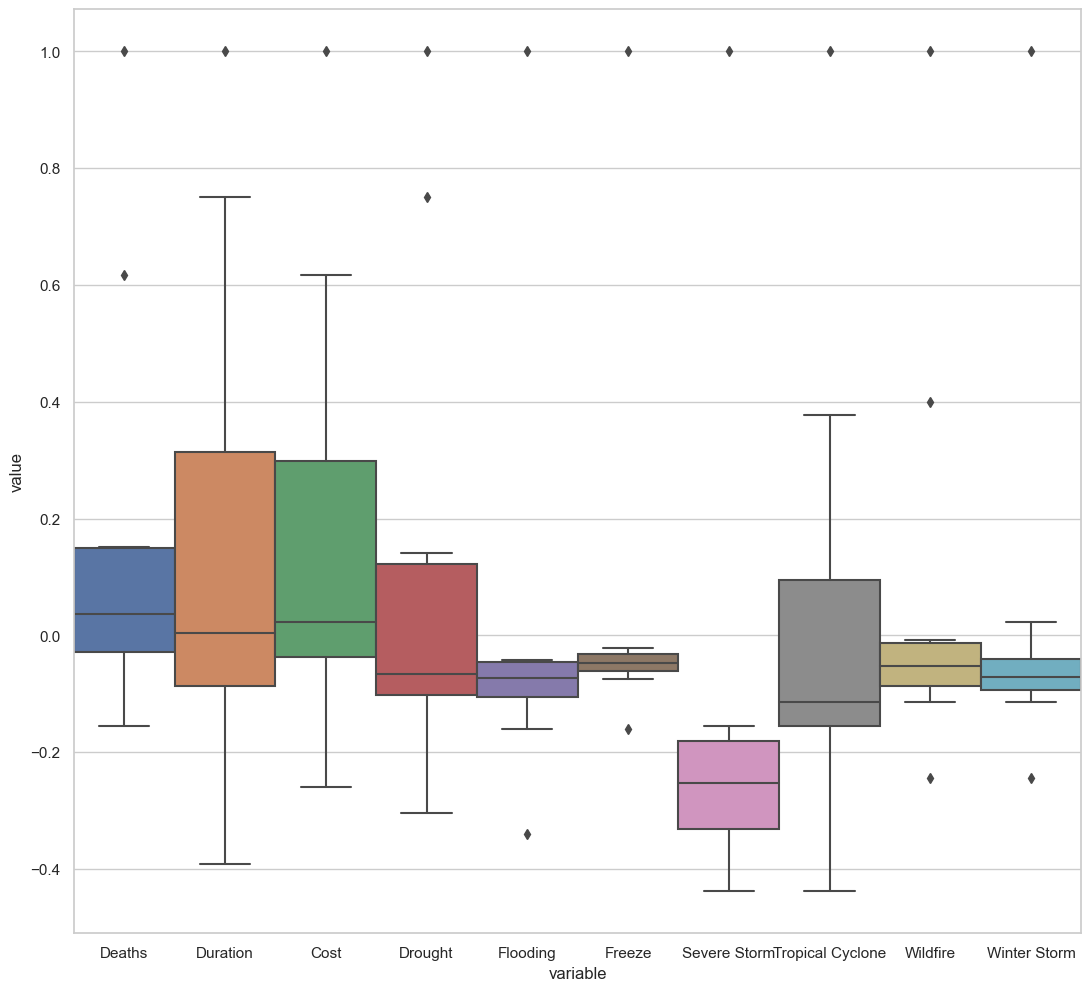

In [29]:
plt.figure(figsize = [13,12])
sns.set(style = "whitegrid")
sns.boxplot(x = "variable", y = "value", data = pd.melt(data.corr()), width = 1)

plt.show()

<AxesSubplot:>

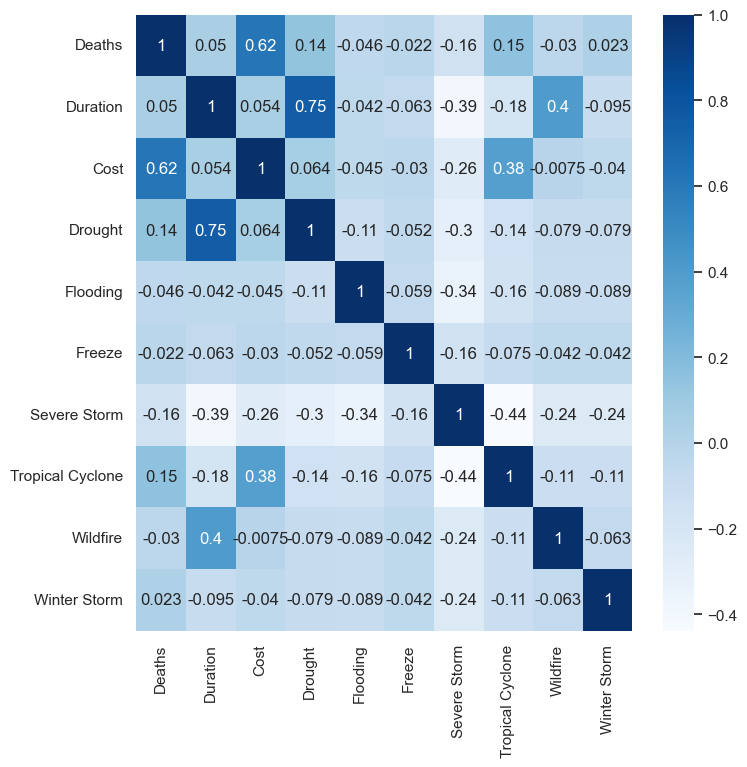

In [30]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), cbar = True, annot = True, cmap='Blues')

We can see, that most corelated with cost is death, second is Tropical cyclone 

In [31]:
data.head()

,Begin Date,End Date,Deaths,Duration,Cost,Drought,Flooding,Freeze,Severe Storm,Tropical Cyclone,Wildfire,Winter Storm
0,1980-04-10,1980-04-17,7,7,2551.4,0,1,0,0,0,0,0
1,1980-08-07,1980-08-11,13,4,2071.0,0,0,0,0,1,0,0
2,1980-06-01,1980-11-30,1260,182,37675.2,1,0,0,0,0,0,0
3,1981-01-12,1981-01-14,0,2,1921.9,0,0,1,0,0,0,0
4,1981-05-05,1981-05-10,20,5,1304.7,0,0,0,1,0,0,0


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335 entries, 0 to 336
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Begin Date        335 non-null    datetime64[ns]
 1   End Date          335 non-null    datetime64[ns]
 2   Deaths            335 non-null    int64         
 3   Duration          335 non-null    int64         
 4   Cost              335 non-null    float64       
 5   Drought           335 non-null    uint8         
 6   Flooding          335 non-null    uint8         
 7   Freeze            335 non-null    uint8         
 8   Severe Storm      335 non-null    uint8         
 9   Tropical Cyclone  335 non-null    uint8         
 10  Wildfire          335 non-null    uint8         
 11  Winter Storm      335 non-null    uint8         
dtypes: datetime64[ns](2), float64(1), int64(2), uint8(7)
memory usage: 18.0 KB


In [33]:
data.drop(["Begin Date","End Date"], axis = 1, inplace = True)

In [ ]:
Assigning y 

In [34]:
y = data["Cost"]

In [35]:
y.head()

0     2551.4
1     2071.0
2    37675.2
3     1921.9
4     1304.7
Name: Cost, dtype: float64

In [36]:
X = data
X.drop(["Cost"], axis = 1, inplace = True)
X.head()

,Deaths,Duration,Drought,Flooding,Freeze,Severe Storm,Tropical Cyclone,Wildfire,Winter Storm
0,7,7,0,1,0,0,0,0,0
1,13,4,0,0,0,0,1,0,0
2,1260,182,1,0,0,0,0,0,0
3,0,2,0,0,1,0,0,0,0
4,20,5,0,0,0,1,0,0,0


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared Error:", mse)
print("r_squared:", r2)

Mean squared Error: 253494294.29464653
r_squared: 0.568853448284956


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=40, batch_size=32)

# Evaluate the model
mse = model.evaluate(X_test_scaled, y_test)
print("Mean Squared Error:", mse)

Epoch 1/40
9/9 [==============================] - 1s 2ms/step - loss: 390957216.0000
Epoch 2/40
9/9 [==============================] - 0s 2ms/step - loss: 390951520.0000
Epoch 3/40
9/9 [==============================] - 0s 2ms/step - loss: 390945472.0000
Epoch 4/40
9/9 [==============================] - 0s 2ms/step - loss: 390940736.0000
Epoch 5/40
9/9 [==============================] - 0s 2ms/step - loss: 390934560.0000
Epoch 6/40
9/9 [==============================] - 0s 2ms/step - loss: 390928032.0000
Epoch 7/40
9/9 [==============================] - 0s 2ms/step - loss: 390920896.0000
Epoch 8/40
9/9 [==============================] - 0s 2ms/step - loss: 390911456.0000
Epoch 9/40
9/9 [==============================] - 0s 1ms/step - loss: 390902688.0000
Epoch 10/40
9/9 [==============================] - 0s 1ms/step - loss: 390890528.0000
Epoch 11/40
9/9 [==============================] - 0s 1ms/step - loss: 390875136.0000
Epoch 12/40
9/9 [==============================] - 0s 2ms/step 

In [48]:
# Define the neural network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=80, batch_size=32)

# Evaluate the model
mse = model.evaluate(X_test_scaled, y_test)
print("Mean Squared Error:", mse)

Epoch 1/80
9/9 [==============================] - 1s 1ms/step - loss: 390945792.0000
Epoch 2/80
9/9 [==============================] - 0s 2ms/step - loss: 390933056.0000
Epoch 3/80
9/9 [==============================] - 0s 2ms/step - loss: 390921376.0000
Epoch 4/80
9/9 [==============================] - 0s 2ms/step - loss: 390909184.0000
Epoch 5/80
9/9 [==============================] - 0s 2ms/step - loss: 390891136.0000
Epoch 6/80
9/9 [==============================] - 0s 2ms/step - loss: 390870336.0000
Epoch 7/80
9/9 [==============================] - 0s 2ms/step - loss: 390840672.0000
Epoch 8/80
9/9 [==============================] - 0s 2ms/step - loss: 390809504.0000
Epoch 9/80
9/9 [==============================] - 0s 2ms/step - loss: 390770432.0000
Epoch 10/80
9/9 [==============================] - 0s 2ms/step - loss: 390718720.0000
Epoch 11/80
9/9 [==============================] - 0s 2ms/step - loss: 390657024.0000
Epoch 12/80
9/9 [==============================] - 0s 2ms/step 

KeyError: 'val_loss'

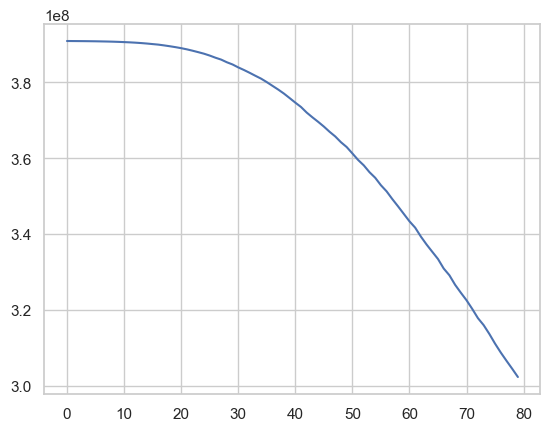

In [49]:
plt.plot(history.history['loss'], label='accuracy')
plt.plot(history.history['val_loss'], label='val_accuracy')
plt.xlabel("Epoch")
plt.xlabel("Loss")
plt.xlim(0,3)
plt.xlim(0,3)
plt.show()